In [1]:
import pickle
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif, chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.cluster import DBSCAN, KMeans
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix
sns.set()

## Importing datasets

In [2]:
df_train = pd.read_csv('../datasets/modeling train data.csv')
df_test = pd.read_csv('../datasets/modeling test data.csv')

In [3]:
X_train = df_train.drop('WnvPresent', axis=1)
X_test = df_test.drop('WnvPresent', axis=1)
y_train = df_train['WnvPresent']
y_test = df_test['WnvPresent']

In [4]:
pd.set_option('display.max_columns', 100)
X_train.head()

,Latitude,Longitude,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,AvgSpeed,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10,Cluster_11,Cluster_12,Cluster_13,Cluster_14,Cluster_15,Cluster_16,Cluster_17,Cluster_18,Cluster_19,Cluster_20,Cluster_21,Cluster_22,Cluster_23,Cluster_24,Cluster_25,Cluster_26,Cluster_27,Cluster_28,Cluster_29,...,Cluster_55,Cluster_56,Cluster_57,Cluster_58,Cluster_59,Cluster_60,Cluster_61,Cluster_62,Cluster_63,Cluster_64,Cluster_65,Cluster_66,Cluster_67,Cluster_68,Cluster_69,Cluster_70,Cluster_71,Cluster_72,Cluster_73,Cluster_74,Cluster_75,Cluster_76,Cluster_77,Cluster_78,Cluster_79,Cluster_80,Cluster_81,Cluster_82,Cluster_83,Cluster_84,Cluster_85,Cluster_86,Cluster_87,Cluster_88,Cluster_89,Cluster_90,Cluster_91,Cluster_92,Cluster_93,Cluster_94,Cluster_95,Cluster_96,Cluster_97,Cluster_98,Cluster_99,Month_Jul,Month_Jun,Month_May,Month_Oct,Month_Sep
0,-1.560060,1.607978,-0.125656,-0.292584,-0.219797,0.596113,-0.375238,-0.275323,0.372680,-0.144807,0.209158,1.356093,1.107057,0.359673,0.647968,-0.550313,1.107520,-0.625800,-0.099903,-0.027166,-0.1642,-0.138717,-0.127826,-0.108578,-0.103602,-0.109961,-0.112004,-0.132513,-0.080821,-0.109961,-0.135929,-0.050137,-0.085321,-0.093693,-0.114012,-0.105047,-0.107179,-0.131356,-0.107179,-0.130189,-0.069936,-0.122972,-0.138717,-0.09126,-0.114674,-0.124202,-0.109272,-0.124202,-0.137051,-0.103602,...,-0.104327,-0.146785,-0.129012,-0.107179,-0.086194,-0.096067,-0.105047,-0.059602,-0.068863,-0.087058,-0.077037,-0.115987,-0.101398,-0.100653,-0.127826,-0.05574,-0.048636,-0.092889,-0.074075,-0.104327,-0.047088,-0.092889,-0.042108,-0.048636,-0.087914,-0.073062,-0.070993,-0.050137,-0.04383,-0.079892,-0.098386,-0.051594,-0.060836,-0.118572,-0.040312,-0.051594,-0.105047,-0.076062,-0.050137,-0.05574,-0.087058,-0.065541,-0.048636,-0.040312,-0.053012,-0.570765,-0.432886,-0.097619,-0.179222,1.834596
1,-0.384376,0.615555,0.138479,0.200257,0.168248,-0.024642,0.243273,0.181998,-0.605462,-0.014161,-0.041472,-0.329313,-0.755449,1.104667,0.988078,-0.550313,-0.902918,1.597955,-0.099903,-0.027166,-0.1642,-0.138717,-0.127826,-0.108578,-0.103602,-0.109961,-0.112004,-0.132513,-0.080821,-0.109961,-0.135929,-0.050137,-0.085321,-0.093693,-0.114012,-0.105047,-0.107179,-0.131356,-0.107179,-0.130189,-0.069936,-0.122972,-0.138717,-0.09126,-0.114674,-0.124202,-0.109272,-0.124202,-0.137051,-0.103602,...,-0.104327,-0.146785,-0.129012,-0.107179,-0.086194,-0.096067,-0.105047,-0.059602,-0.068863,-0.087058,-0.077037,-0.115987,-0.101398,9.935083,-0.127826,-0.05574,-0.048636,-0.092889,-0.074075,-0.104327,-0.047088,-0.092889,-0.042108,-0.048636,-0.087914,-0.073062,-0.070993,-0.050137,-0.04383,-0.079892,-0.098386,-0.051594,-0.060836,-0.118572,-0.040312,-0.051594,-0.105047,-0.076062,-0.050137,-0.05574,-0.087058,-0.065541,-0.048636,-0.040312,-0.053012,1.752035,-0.432886,-0.097619,-0.179222,-0.545079
2,1.069872,-2.800341,-2.246744,-2.454045,-2.395895,-0.486598,-1.902887,-2.172359,3.873400,-1.652257,0.698290,-1.423446,-0.466643,1.278499,1.402846,-0.550313,-0.902918,1.597955,-0.099903,-0.027166,-0.1642,-0.138717,-0.127826,-0.108578,-0.103602,9.094158,-0.112004,-0.132513,-0.080821,-0.109961,-0.135929,-0.050137,-0.085321,-0.093693,-0.114012,-0.105047,-0.107179,-0.131356,-0.107179,-0.130189,-0.069936,-0.122972,-0.138717,-0.09126,-0.114674,-0.124202,-0.109272,-0.124202,-0.137051,-0.103602,...,-0.104327,-0.146785,-0.129012,-0.107179,-0.086194,-0.096067,-0.105047,-0.059602,-0.068863,-0.087058,-0.077037,-0.115987,-0.101398,-0.100653,-0.127826,-0.05574,-0.048636,-0.092889,-0.074075,-0.104327,-0.047088,-0.092889,-0.042108,-0.048636,-0.087914,-0.073062,-0.070993,-0.050137,-0.04383,-0.079892,-0.098386,-0.051594,-0.060836,-0.118572,-0.040312,-0.051594,-0.105047,-0.076062,-0.050137,-0.0557

In [5]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: WnvPresent, dtype: int64

In [6]:
X_test.head()

,Latitude,Longitude,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,AvgSpeed,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10,Cluster_11,Cluster_12,Cluster_13,Cluster_14,Cluster_15,Cluster_16,Cluster_17,Cluster_18,Cluster_19,Cluster_20,Cluster_21,Cluster_22,Cluster_23,Cluster_24,Cluster_25,Cluster_26,Cluster_27,Cluster_28,Cluster_29,...,Cluster_55,Cluster_56,Cluster_57,Cluster_58,Cluster_59,Cluster_60,Cluster_61,Cluster_62,Cluster_63,Cluster_64,Cluster_65,Cluster_66,Cluster_67,Cluster_68,Cluster_69,Cluster_70,Cluster_71,Cluster_72,Cluster_73,Cluster_74,Cluster_75,Cluster_76,Cluster_77,Cluster_78,Cluster_79,Cluster_80,Cluster_81,Cluster_82,Cluster_83,Cluster_84,Cluster_85,Cluster_86,Cluster_87,Cluster_88,Cluster_89,Cluster_90,Cluster_91,Cluster_92,Cluster_93,Cluster_94,Cluster_95,Cluster_96,Cluster_97,Cluster_98,Cluster_99,Month_Jul,Month_Jun,Month_May,Month_Oct,Month_Sep
0,-0.843581,0.972100,0.674754,0.594530,0.632381,-0.067950,0.235821,0.410658,-0.631202,0.588818,-0.271889,0.096183,-0.301611,-0.449178,0.204166,1.817149,-0.902918,-0.625800,-0.099903,-0.027166,-0.1642,-0.138717,-0.127826,-0.108578,-0.103602,-0.109961,-0.112004,-0.132513,-0.080821,-0.109961,-0.135929,-0.050137,-0.085321,-0.093693,-0.114012,-0.105047,-0.107179,-0.131356,-0.107179,-0.130189,-0.069936,-0.122972,-0.138717,-0.09126,-0.114674,-0.124202,-0.109272,-0.124202,-0.137051,-0.103602,...,-0.104327,-0.146785,-0.129012,-0.107179,-0.086194,-0.096067,-0.105047,-0.059602,-0.068863,-0.087058,-0.077037,-0.115987,-0.101398,-0.100653,-0.127826,-0.05574,-0.048636,-0.092889,-0.074075,-0.104327,-0.047088,-0.092889,-0.042108,-0.048636,-0.087914,-0.073062,-0.070993,-0.050137,-0.04383,-0.079892,-0.098386,-0.051594,-0.060836,-0.118572,-0.040312,-0.051594,9.519539,-0.076062,-0.050137,-0.05574,-0.087058,-0.065541,-0.048636,-0.040312,-0.053012,-0.570765,-0.432886,-0.097619,-0.179222,-0.545079
1,-1.079151,1.330553,-0.197693,-0.489721,-0.364363,0.841528,-0.852163,-0.597142,0.372680,-0.335751,-1.124839,1.781589,1.590365,0.799574,0.855352,1.817149,-0.902918,-0.625800,-0.099903,-0.027166,-0.1642,-0.138717,-0.127826,-0.108578,-0.103602,-0.109961,-0.112004,-0.132513,-0.080821,-0.109961,-0.135929,-0.050137,-0.085321,-0.093693,-0.114012,-0.105047,-0.107179,-0.131356,-0.107179,-0.130189,-0.069936,-0.122972,7.208935,-0.09126,-0.114674,-0.124202,-0.109272,-0.124202,-0.137051,-0.103602,...,-0.104327,-0.146785,-0.129012,-0.107179,-0.086194,-0.096067,-0.105047,-0.059602,-0.068863,-0.087058,-0.077037,-0.115987,-0.101398,-0.100653,-0.127826,-0.05574,-0.048636,-0.092889,-0.074075,-0.104327,-0.047088,-0.092889,-0.042108,-0.048636,-0.087914,-0.073062,-0.070993,-0.050137,-0.04383,-0.079892,-0.098386,-0.051594,-0.060836,-0.118572,-0.040312,-0.051594,-0.105047,-0.076062,-0.050137,-0.05574,-0.087058,-0.065541,-0.048636,-0.040312,-0.053012,-0.570765,-0.432886,-0.097619,-0.179222,1.834596
2,-1.057927,0.206043,0.770804,1.192980,1.012818,0.798219,1.450488,1.299894,-0.631202,1.091302,2.258663,-0.102750,-0.572735,-1.630526,-1.226785,-0.550313,1.107520,-0.625800,-0.099903,-0.027166,-0.1642,-0.138717,-0.127826,-0.108578,-0.103602,-0.109961,-0.112004,-0.132513,-0.080821,-0.109961,-0.135929,-0.050137,-0.085321,-0.093693,-0.114012,-0.105047,-0.107179,-0.131356,-0.107179,-0.130189,-0.069936,-0.122972,-0.138717,-0.09126,-0.114674,-0.124202,-0.109272,-0.124202,-0.137051,-0.103602,...,-0.104327,-0.146785,-0.129012,-0.107179,-0.086194,-0.096067,-0.105047,-0.059602,-0.068863,-0.087058,-0.077037,-0.115987,-0.101398,-0.100653,-0.127826,-0.05574,-0.048636,-0.092889,-0.074075,-0.104327,-0.047088,-0.092889,-0.042108,-0.048636,-0.087914,13.686977,-0.070993,-0.050137,-0.04383,-0.079892,-0.098386,-0.051594,-0.060836,-0.118572,-0.040312,-0.051594,-0.105047,-0.076062,-0.050137,-0.05574,-

In [7]:
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: WnvPresent, dtype: int64

## Logistic Regression

In [8]:
lr = LogisticRegression(max_iter=10000, solver='liblinear')

params = {
    'penalty': ['l1', 'l2'],
    'C': [0.8, 0.85, 0.9, 0.95, 1],
}

lrcv = RandomizedSearchCV(lr, param_distributions=params, scoring='roc_auc', n_jobs=4, n_iter=5, verbose=1)
lrcv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  2.0min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=10000,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='liblinear', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=5, n_jobs=4,
                   param_distributions={'C': [0.8, 0.85, 0.9, 0.95, 1],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='roc_auc',

In [9]:
lrcv.best_params_ # Using L1 regularization

{'penalty': 'l1', 'C': 0.95}

In [10]:
lr_opt = LogisticRegression(max_iter=10000, C=0.95, penalty='l1', solver='liblinear')
lr_opt.fit(X_train, y_train)

LogisticRegression(C=0.95, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
cross_val_score(lr_opt, X_train, y_train, scoring='roc_auc').mean()

0.8931869007649598

In [12]:
roc_auc_score(y_test, lr_opt.predict(X_test))

0.7369351346907458

In [13]:
# Doing confusion matrix on the test set

tn, fp, fn, tp = confusion_matrix(y_test, lr_opt.predict(X_test)).ravel()

In [14]:
sensitivity = tp/(tp+fn)
sensitivity

0.7032967032967034

In [15]:
specificity = tn/(tn+fp)
specificity

0.770573566084788

## RandomForest

In [16]:
rf = RandomForestClassifier()

params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [5, 10, 15, 20]
}

rfcv = RandomizedSearchCV(rf, param_distributions=params, scoring='roc_auc', verbose=1)

In [17]:
rfcv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [18]:
rfcv.best_params_

{'min_samples_leaf': 5, 'max_depth': 10}

In [19]:
rf_opt = RandomForestClassifier(min_samples_leaf=15, max_depth=10)
rf_opt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
cross_val_score(rf_opt, X_train, y_train, scoring='roc_auc').mean()

0.9720668480658304

In [21]:
roc_auc_score(y_test, rf_opt.predict(X_test))

0.7275013016908279

In [22]:
tn, fp, fn, tp = confusion_matrix(y_test, rf_opt.predict(X_test)).ravel()

In [23]:
sensitivity = tp/(tp+fn)
sensitivity

0.5934065934065934

In [24]:
specificity = tn/(tn+fp)
specificity

0.8615960099750624

## XGBoost

In [25]:
one_to_left = stats.beta(10, 1)
from_zero_positive = stats.expon(0, 50)

params = {
    "n_estimators": stats.randint(3, 40),
    "max_depth": stats.randint(3, 40),
    "learning_rate": stats.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": stats.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

In [26]:
xg_class = XGBClassifier()

xgbcv = RandomizedSearchCV(xg_class, params, scoring='roc_auc', n_jobs=5, verbose=1)
xgbcv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   22.4s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:   26.8s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000013804063BE0>,
                                        'reg_a

In [27]:
xgbcv.best_params_

{'colsample_bytree': 0.9728844679995327,
 'gamma': 1.4306009681613863,
 'learning_rate': 0.2441446128399673,
 'max_depth': 9,
 'min_child_weight': 1.039072775643963,
 'n_estimators': 9,
 'reg_alpha': 9.865826292462513,
 'subsample': 0.8978924835291335}

In [28]:
xgb_opt = XGBClassifier(colsample_bytree=0.9935453635694246, 
                            gamma=7.349086577075584,
                           learning_rate=0.35008205099820777,
                           max_depth=35,
                           min_child_weight=17.433430217739435,
                           n_estimators=28,
                           reg_alpha=21.219411729470913,
                           subsample=0.9430437140270478)
xgb_opt.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9935453635694246,
              gamma=7.349086577075584, learning_rate=0.35008205099820777,
              max_delta_step=0, max_depth=35,
              min_child_weight=17.433430217739435, missing=None,
              n_estimators=28, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0,
              reg_alpha=21.219411729470913, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.9430437140270478,
              verbosity=1)

In [29]:
cross_val_score(xgb_opt, X_train, y_train, scoring='roc_auc').mean()

0.984197349576626

In [30]:
roc_auc_score(y_test, xgb_opt.predict(X_test))

0.6340124962319477

In [31]:
tn, fp, fn, tp = confusion_matrix(y_test, xgb_opt.predict(X_test)).ravel()

In [32]:
sensitivity = tp/(tp+fn)
sensitivity

0.2967032967032967

In [33]:
specificity = tn/(tn+fp)
specificity

0.9713216957605985

## Evaluation

Based on the 3 models which we have tried, logistic regression seems to return the highest ROC-AUC scores. As such we will evaluate it and use it for Kaggle submission

In [34]:
pred_proba = [i[1] for i in lr_opt.predict_proba(X_test)]
pred_df = pd.DataFrame({'true_values': y_test,'pred_probs':pred_proba})

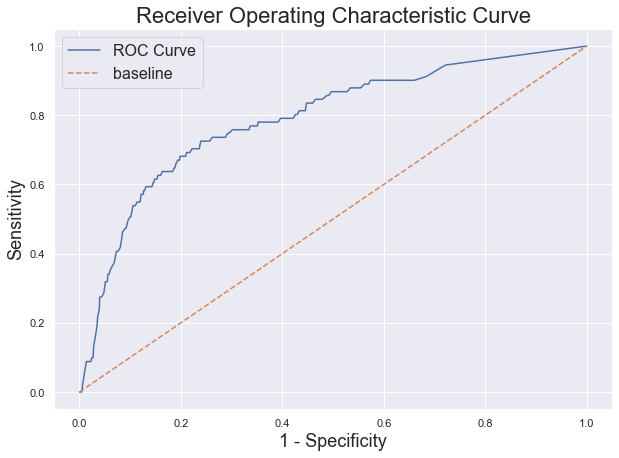

In [35]:
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);


## Predicting for Kaggle

In [36]:
kaggle = pd.read_csv('../datasets/cleaned_agg_test_wx_clustered.csv')

In [37]:
kaggle.head(2)

,Date,Id,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Station,Sunrise,Sunset,CodeSum,ResultDir,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,AvgSpeed,Cluster
0,2008-06-11,1,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0416,1926,,18,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.0,0.125333,29.156,29.875667,8.513333,10.33,10
1,2008-06-11,2,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0416,1926,,18,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.0,0.125333,29.156,29.875667,8.513333,10.33,10


In [38]:
kaggle['Date'] = pd.to_datetime(kaggle['Date'])
kaggle['Month'] = [i.month for i in kaggle['Date']]

In [39]:
kaggle.head(2)

,Date,Id,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Station,Sunrise,Sunset,CodeSum,ResultDir,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,AvgSpeed,Cluster,Month
0,2008-06-11,1,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0416,1926,,18,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.0,0.125333,29.156,29.875667,8.513333,10.33,10,6
1,2008-06-11,2,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0416,1926,,18,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.0,0.125333,29.156,29.875667,8.513333,10.33,10,6


In [40]:
kaggle.Month.unique() # No May in month feature

array([ 6,  7,  8,  9, 10], dtype=int64)

In [41]:
kaggle['Month'] = kaggle['Month'].map({5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10:'Oct'})

In [42]:
kaggle.drop(['Trap', 'Address', 'Station', 'Block', 'Street', 'AddressNumberAndStreet', 'AddressAccuracy', 'Date', 'CodeSum', 'ResultDir', 'Sunset', 'Sunrise', 'SnowFall'], axis=1, inplace=True)

In [43]:
kaggle.head(2)

,Id,Species,Latitude,Longitude,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,AvgSpeed,Cluster,Month
0,1,CULEX PIPIENS/RESTUANS,41.95469,-87.800991,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.125333,29.156,29.875667,8.513333,10.33,10,Jun
1,2,CULEX RESTUANS,41.95469,-87.800991,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.125333,29.156,29.875667,8.513333,10.33,10,Jun


In [44]:
kaggle_enc = pd.get_dummies(kaggle, columns=['Species', 'Cluster', 'Month'], drop_first=True)

In [45]:
kaggle_enc.head(2)

,Id,Latitude,Longitude,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,AvgSpeed,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10,Cluster_11,Cluster_12,Cluster_13,Cluster_14,Cluster_15,Cluster_16,Cluster_17,Cluster_18,Cluster_19,Cluster_20,Cluster_21,Cluster_22,Cluster_23,Cluster_24,Cluster_25,Cluster_26,Cluster_27,...,Cluster_54,Cluster_55,Cluster_56,Cluster_57,Cluster_58,Cluster_59,Cluster_60,Cluster_61,Cluster_62,Cluster_63,Cluster_64,Cluster_65,Cluster_66,Cluster_67,Cluster_68,Cluster_69,Cluster_70,Cluster_71,Cluster_72,Cluster_73,Cluster_74,Cluster_75,Cluster_76,Cluster_77,Cluster_78,Cluster_79,Cluster_80,Cluster_81,Cluster_82,Cluster_83,Cluster_84,Cluster_85,Cluster_86,Cluster_87,Cluster_88,Cluster_89,Cluster_90,Cluster_91,Cluster_92,Cluster_93,Cluster_94,Cluster_95,Cluster_96,Cluster_97,Cluster_98,Cluster_99,Month_Jul,Month_Jun,Month_Oct,Month_Sep
0,1,41.95469,-87.800991,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.125333,29.156,29.875667,8.513333,10.33,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,41.95469,-87.800991,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.125333,29.156,29.875667,8.513333,10.33,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [46]:
X_train.head(2)

,Latitude,Longitude,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,AvgSpeed,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10,Cluster_11,Cluster_12,Cluster_13,Cluster_14,Cluster_15,Cluster_16,Cluster_17,Cluster_18,Cluster_19,Cluster_20,Cluster_21,Cluster_22,Cluster_23,Cluster_24,Cluster_25,Cluster_26,Cluster_27,Cluster_28,Cluster_29,...,Cluster_55,Cluster_56,Cluster_57,Cluster_58,Cluster_59,Cluster_60,Cluster_61,Cluster_62,Cluster_63,Cluster_64,Cluster_65,Cluster_66,Cluster_67,Cluster_68,Cluster_69,Cluster_70,Cluster_71,Cluster_72,Cluster_73,Cluster_74,Cluster_75,Cluster_76,Cluster_77,Cluster_78,Cluster_79,Cluster_80,Cluster_81,Cluster_82,Cluster_83,Cluster_84,Cluster_85,Cluster_86,Cluster_87,Cluster_88,Cluster_89,Cluster_90,Cluster_91,Cluster_92,Cluster_93,Cluster_94,Cluster_95,Cluster_96,Cluster_97,Cluster_98,Cluster_99,Month_Jul,Month_Jun,Month_May,Month_Oct,Month_Sep
0,-1.560060,1.607978,-0.125656,-0.292584,-0.219797,0.596113,-0.375238,-0.275323,0.372680,-0.144807,0.209158,1.356093,1.107057,0.359673,0.647968,-0.550313,1.107520,-0.625800,-0.099903,-0.027166,-0.1642,-0.138717,-0.127826,-0.108578,-0.103602,-0.109961,-0.112004,-0.132513,-0.080821,-0.109961,-0.135929,-0.050137,-0.085321,-0.093693,-0.114012,-0.105047,-0.107179,-0.131356,-0.107179,-0.130189,-0.069936,-0.122972,-0.138717,-0.09126,-0.114674,-0.124202,-0.109272,-0.124202,-0.137051,-0.103602,...,-0.104327,-0.146785,-0.129012,-0.107179,-0.086194,-0.096067,-0.105047,-0.059602,-0.068863,-0.087058,-0.077037,-0.115987,-0.101398,-0.100653,-0.127826,-0.05574,-0.048636,-0.092889,-0.074075,-0.104327,-0.047088,-0.092889,-0.042108,-0.048636,-0.087914,-0.073062,-0.070993,-0.050137,-0.04383,-0.079892,-0.098386,-0.051594,-0.060836,-0.118572,-0.040312,-0.051594,-0.105047,-0.076062,-0.050137,-0.05574,-0.087058,-0.065541,-0.048636,-0.040312,-0.053012,-0.570765,-0.432886,-0.097619,-0.179222,1.834596
1,-0.384376,0.615555,0.138479,0.200257,0.168248,-0.024642,0.243273,0.181998,-0.605462,-0.014161,-0.041472,-0.329313,-0.755449,1.104667,0.988078,-0.550313,-0.902918,1.597955,-0.099903,-0.027166,-0.1642,-0.138717,-0.127826,-0.108578,-0.103602,-0.109961,-0.112004,-0.132513,-0.080821,-0.109961,-0.135929,-0.050137,-0.085321,-0.093693,-0.114012,-0.105047,-0.107179,-0.131356,-0.107179,-0.130189,-0.069936,-0.122972,-0.138717,-0.09126,-0.114674,-0.124202,-0.109272,-0.124202,-0.137051,-0.103602,...,-0.104327,-0.146785,-0.129012,-0.107179,-0.086194,-0.096067,-0.105047,-0.059602,-0.068863,-0.087058,-0.077037,-0.115987,-0.101398,9.935083,-0.127826,-0.05574,-0.048636,-0.092889,-0.074075,-0.104327,-0.047088,-0.092889,-0.042108,-0.048636,-0.087914,-0.073062,-0.070993,-0.050137,-0.04383,-0.079892,-0.098386,-0.051594,-0.060836,-0.118572,-0.040312,-0.051594,-0.105047,-0.076062,-0.050137,-0.05574,-0.087058,-0.065541,-0.048636,-0.040312,-0.053012,1.752035,-0.432886,-0.097619,-0.179222,-0.545079


In [47]:
kaggle_enc.head()

,Id,Latitude,Longitude,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,AvgSpeed,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10,Cluster_11,Cluster_12,Cluster_13,Cluster_14,Cluster_15,Cluster_16,Cluster_17,Cluster_18,Cluster_19,Cluster_20,Cluster_21,Cluster_22,Cluster_23,Cluster_24,Cluster_25,Cluster_26,Cluster_27,...,Cluster_54,Cluster_55,Cluster_56,Cluster_57,Cluster_58,Cluster_59,Cluster_60,Cluster_61,Cluster_62,Cluster_63,Cluster_64,Cluster_65,Cluster_66,Cluster_67,Cluster_68,Cluster_69,Cluster_70,Cluster_71,Cluster_72,Cluster_73,Cluster_74,Cluster_75,Cluster_76,Cluster_77,Cluster_78,Cluster_79,Cluster_80,Cluster_81,Cluster_82,Cluster_83,Cluster_84,Cluster_85,Cluster_86,Cluster_87,Cluster_88,Cluster_89,Cluster_90,Cluster_91,Cluster_92,Cluster_93,Cluster_94,Cluster_95,Cluster_96,Cluster_97,Cluster_98,Cluster_99,Month_Jul,Month_Jun,Month_Oct,Month_Sep
0,1,41.95469,-87.800991,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.125333,29.156,29.875667,8.513333,10.33,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,41.95469,-87.800991,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.125333,29.156,29.875667,8.513333,10.33,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,41.95469,-87.800991,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.125333,29.156,29.875667,8.513333,10.33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,41.95469,-87.800991,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.125333,29.156,29.875667,8.513333,10.33,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,41.95469,-87.800991,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.125333,29.156,29.875667,8.513333,10.33,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [48]:
# Kaggle set has 2 more extra features than the input required & lacked 1 feature: 
# Extra: Id & Species_UNSPECIFIED CULEX
# Lacked: Month_May

# Adding, removing & rearranging accordingly to be same column input as X_train

kaggle_enc.set_index('Id', inplace=True) # "Removing" Id by setting it as index
kaggle_enc.head()

,Latitude,Longitude,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,AvgSpeed,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10,Cluster_11,Cluster_12,Cluster_13,Cluster_14,Cluster_15,Cluster_16,Cluster_17,Cluster_18,Cluster_19,Cluster_20,Cluster_21,Cluster_22,Cluster_23,Cluster_24,Cluster_25,Cluster_26,Cluster_27,Cluster_28,...,Cluster_54,Cluster_55,Cluster_56,Cluster_57,Cluster_58,Cluster_59,Cluster_60,Cluster_61,Cluster_62,Cluster_63,Cluster_64,Cluster_65,Cluster_66,Cluster_67,Cluster_68,Cluster_69,Cluster_70,Cluster_71,Cluster_72,Cluster_73,Cluster_74,Cluster_75,Cluster_76,Cluster_77,Cluster_78,Cluster_79,Cluster_80,Cluster_81,Cluster_82,Cluster_83,Cluster_84,Cluster_85,Cluster_86,Cluster_87,Cluster_88,Cluster_89,Cluster_90,Cluster_91,Cluster_92,Cluster_93,Cluster_94,Cluster_95,Cluster_96,Cluster_97,Cluster_98,Cluster_99,Month_Jul,Month_Jun,Month_Oct,Month_Sep
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41.95469,-87.800991,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.125333,29.156,29.875667,8.513333,10.33,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,41.95469,-87.800991,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.125333,29.156,29.875667,8.513333,10.33,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,41.95469,-87.800991,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.125333,29.156,29.875667,8.513333,10.33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,41.95469,-87.800991,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.125333,29.156,29.875667,8.513333,10.33,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,41.95469,-87.800991,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.125333,29.156,29.875667,8.513333,10.33,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [49]:
kaggle_enc.drop('Species_UNSPECIFIED CULEX', axis=1, inplace=True)
kaggle_enc['Month_May'] = 0

In [50]:
kaggle_enc = kaggle_enc[X_train.columns]

In [51]:
kaggle_enc.head()

,Latitude,Longitude,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,AvgSpeed,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10,Cluster_11,Cluster_12,Cluster_13,Cluster_14,Cluster_15,Cluster_16,Cluster_17,Cluster_18,Cluster_19,Cluster_20,Cluster_21,Cluster_22,Cluster_23,Cluster_24,Cluster_25,Cluster_26,Cluster_27,Cluster_28,Cluster_29,...,Cluster_55,Cluster_56,Cluster_57,Cluster_58,Cluster_59,Cluster_60,Cluster_61,Cluster_62,Cluster_63,Cluster_64,Cluster_65,Cluster_66,Cluster_67,Cluster_68,Cluster_69,Cluster_70,Cluster_71,Cluster_72,Cluster_73,Cluster_74,Cluster_75,Cluster_76,Cluster_77,Cluster_78,Cluster_79,Cluster_80,Cluster_81,Cluster_82,Cluster_83,Cluster_84,Cluster_85,Cluster_86,Cluster_87,Cluster_88,Cluster_89,Cluster_90,Cluster_91,Cluster_92,Cluster_93,Cluster_94,Cluster_95,Cluster_96,Cluster_97,Cluster_98,Cluster_99,Month_Jul,Month_Jun,Month_May,Month_Oct,Month_Sep
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41.95469,-87.800991,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.125333,29.156,29.875667,8.513333,10.33,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.95469,-87.800991,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.125333,29.156,29.875667,8.513333,10.33,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,41.95469,-87.800991,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.125333,29.156,29.875667,8.513333,10.33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,41.95469,-87.800991,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.125333,29.156,29.875667,8.513333,10.33,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,41.95469,-87.800991,71.8,50.8,61.566667,-1.033333,48.9,55.2,5.966667,2.533333,0.125333,29.156,29.875667,8.513333,10.33,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [52]:
ss = pickle.load(open('../datasets/scaler.sav', 'rb'))

In [53]:
kaggle_enc_scaled = ss.transform(kaggle_enc)

In [54]:
predictions = lr_opt.predict_proba(kaggle_enc_scaled)

In [55]:
predictions = pd.DataFrame(predictions)

In [56]:
predictions.head()

,0,1
0,0.999945,5.524009e-05
1,0.999974,2.641804e-05
2,0.999942,5.773541e-05
3,1.000000,5.050143e-08
4,1.000000,4.942501e-08


In [57]:
kaggle['Prediction'] = predictions[1]

In [58]:
submission = kaggle[['Id', 'Prediction']]
submission.columns = ['Id', 'WnvPresent']
submission.head()

,Id,WnvPresent
0,1,5.524009e-05
1,2,2.641804e-05
2,3,5.773541e-05
3,4,5.050143e-08
4,5,4.942501e-08


In [59]:
submission.to_csv('../datasets/kaggle_submission.csv', index=False)

**Final ROC AUC scoring on Kaggle for our model is approximately 0.75**